# Lending Club Case Study

### importing all the required libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
import seaborn as sns
sns.set(style='whitegrid')
import warnings
warnings.filterwarnings('ignore')
import chardet

##### checking the encoding of the loan data set file

In [3]:
file_read = open('loan.csv','rb').read(100)
print(chardet.detect(file_read))

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}


In [4]:
#Reading the loan data set
loan_df = pd.read_csv('loan.csv',encoding='utf-8')

In [5]:
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [6]:
loan_df.shape

(39717, 111)

In [7]:
round((loan_df.isnull().sum()/len(loan_df.index))*100,2)

id                              0.0
member_id                       0.0
loan_amnt                       0.0
funded_amnt                     0.0
funded_amnt_inv                 0.0
                              ...  
tax_liens                       0.1
tot_hi_cred_lim               100.0
total_bal_ex_mort             100.0
total_bc_limit                100.0
total_il_high_credit_limit    100.0
Length: 111, dtype: float64

In [8]:
#Removing the columns with complete null values
loan_df = loan_df.dropna(axis=1,how='all')

In [9]:
loan_df.shape

(39717, 57)

In [10]:
(loan_df.isnull().sum()/len(loan_df.index)*100)

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.580507
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


In [11]:
# droping the columns where more than 60% values are null
#mths_since_last_delinq,desc,mths_since_last_record,next_pymnt_d
loan_df = loan_df.drop(['mths_since_last_delinq','desc','mths_since_last_record','next_pymnt_d'],axis=1)

In [12]:
loan_df.shape

(39717, 53)

### lets remove all the columns which will not impact or required for our analysis

- collections_12_mths_ex_med

- chargeoff_within_12_mths and tax_liens

- member_id

- pymnt_plan

- url

- zip_code

- initial_list_status

- policy_code

- application_type

- acc_now_delinq

- delinq_amnt

- funded_amnt

- funded_amnt_inv

In [13]:
loan_df = loan_df.drop(['id','member_id','funded_amnt','funded_amnt_inv','pymnt_plan','url','zip_code','initial_list_status','collections_12_mths_ex_med','policy_code','application_type','acc_now_delinq','chargeoff_within_12_mths','delinq_amnt','tax_liens'],axis=1)

In [14]:
loan_df.shape

(39717, 38)

In [15]:
round((loan_df.isnull().sum()/len(loan_df.index))*100,2)

loan_amnt                  0.00
term                       0.00
int_rate                   0.00
installment                0.00
grade                      0.00
sub_grade                  0.00
emp_title                  6.19
emp_length                 2.71
home_ownership             0.00
annual_inc                 0.00
verification_status        0.00
issue_d                    0.00
loan_status                0.00
purpose                    0.00
title                      0.03
addr_state                 0.00
dti                        0.00
delinq_2yrs                0.00
earliest_cr_line           0.00
inq_last_6mths             0.00
open_acc                   0.00
pub_rec                    0.00
revol_bal                  0.00
revol_util                 0.13
total_acc                  0.00
out_prncp                  0.00
out_prncp_inv              0.00
total_pymnt                0.00
total_pymnt_inv            0.00
total_rec_prncp            0.00
total_rec_int              0.00
total_re

#### Removing all the null values present in the below columns

##### emp_title 
- has 6.19% of null values hence removing those records
##### emp_length 
- has 2.71% of null values hence removing those records
##### revol_util 
- has 0.13% of null values hence removing those records
##### last_pymnt_d 
- has 0.18% of null values hence removing those records
##### last_credit_pull_d  
- has 0.01% of null values hence removing those records
##### pub_rec_bankruptcies 
- has 1.75% of null values hence removing those records

In [16]:
#lets remove all null values present in the below columns
loan_df = loan_df.dropna(axis=0)

In [17]:
#re-arranging the index numbers
loan_df.reset_index(drop=True,inplace=True)

In [18]:
loan_df.shape

(36433, 38)

In [19]:
loan_df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,2500,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
1,10000,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
2,3000,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,...,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0
3,5000,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,...,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0
4,7000,60 months,15.96%,170.08,C,C5,Southern Star Photography,8 years,RENT,47004.0,...,10110.84,6985.61,3125.23,0.00,0.00,0.00,May-16,1313.76,May-16,0.0


In [20]:
emp_term = {'10+ years':10,'< 1 year':0,'2 years':2,'3 years':3,'4 years':4,'1 year':1,'5 years':5,'6 years':6,'7 years':7,'8 years':8,'9 years':9}

In [21]:
#cleaning the emp_length column
loan_df.replace({'emp_length':emp_term},inplace=True)

In [22]:
#Removing the text months from the term column
loan_df['term'] = loan_df['term'].apply(lambda x:x.strip('months')).astype('float')

In [23]:
#removing the % from the column int_rate
loan_df['int_rate'] = loan_df['int_rate'].apply(lambda x:x.strip('%')).astype('float')

In [24]:
#removing the % from the column revol_util
loan_df['revol_util'] = loan_df['revol_util'].apply(lambda x:x.strip('%')).astype('float')

In [25]:
# Columns like issue_d,last_pymnt_d,last_credit_pull_d,earliest_cr_line are date column but there data type is object,
# hence converting into datetime formate
loan_df['issue_d'] = pd.to_datetime(loan_df['issue_d'],format='%b-%y')
loan_df['last_pymnt_d'] = pd.to_datetime(loan_df['last_pymnt_d'],format='%b-%y')
loan_df['last_credit_pull_d'] = pd.to_datetime(loan_df['last_credit_pull_d'],format='%b-%y')
loan_df['earliest_cr_line'] = pd.to_datetime(loan_df['earliest_cr_line'],format='%b-%y')

In [26]:
#rounding the values of columns total_pymnt,total_rec_late_fee,collection_recovery_fee to 2 decimal places
loan_df['total_pymnt'] = round(loan_df['total_pymnt'],2)
loan_df['total_rec_late_fee'] = round(loan_df['total_rec_late_fee'],2)
loan_df['collection_recovery_fee'] = round(loan_df['collection_recovery_fee'],2)

In [27]:
#seperating the month and year and creating the seperate clumns for further analyisis
loan_df['earliest_cr_line_month'] = loan_df['earliest_cr_line'].dt.month
loan_df['earliest_cr_line_year'] = loan_df['earliest_cr_line'].dt.year

loan_df['issue_d_month'] = loan_df['issue_d'].dt.month
loan_df['issue_d_year'] = loan_df['issue_d'].dt.year

In [28]:
len(loan_df[loan_df['earliest_cr_line_year'] > 2011 ])

50

In [29]:
loan_df.loc[loan_df['earliest_cr_line_year']>2010,'earliest_cr_line_year'] = loan_df['earliest_cr_line_year']-100

In [30]:
loan_df.shape

(36433, 42)

In [31]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36433 entries, 0 to 36432
Data columns (total 42 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   loan_amnt                36433 non-null  int64         
 1   term                     36433 non-null  float64       
 2   int_rate                 36433 non-null  float64       
 3   installment              36433 non-null  float64       
 4   grade                    36433 non-null  object        
 5   sub_grade                36433 non-null  object        
 6   emp_title                36433 non-null  object        
 7   emp_length               36433 non-null  int64         
 8   home_ownership           36433 non-null  object        
 9   annual_inc               36433 non-null  float64       
 10  verification_status      36433 non-null  object        
 11  issue_d                  36433 non-null  datetime64[ns]
 12  loan_status              36433 n

In [32]:
loan_df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,earliest_cr_line_month,earliest_cr_line_year,issue_d_month,issue_d_year
0,2500,60.0,15.27,59.83,C,C4,Ryder,0,RENT,30000.0,...,117.08,1.11,2013-04-01,119.66,2013-09-01,0.0,4,1999,12,2011
1,10000,36.0,13.49,339.31,C,C1,AIR RESOURCES BOARD,10,RENT,49200.0,...,0.00,0.00,2015-01-01,357.48,2016-04-01,0.0,2,1996,12,2011
2,3000,60.0,12.69,67.79,B,B5,University Medical Group,1,RENT,80000.0,...,0.00,0.00,2016-05-01,67.79,2016-05-01,0.0,1,1996,12,2011
3,5000,36.0,7.90,156.46,A,A4,Veolia Transportaton,3,RENT,36000.0,...,0.00,0.00,2015-01-01,161.03,2016-01-01,0.0,11,2004,12,2011
4,7000,60.0,15.96,170.08,C,C5,Southern Star Photography,8,RENT,47004.0,...,0.00,0.00,2016-05-01,1313.76,2016-05-01,0.0,7,2005,12,2011


In [33]:
loan_df['loan_amnt'].describe()

count    36433.000000
mean     11307.679851
std       7433.859357
min        500.000000
25%       5600.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [34]:
loan_df['term'].value_counts()

36.0    26377
60.0    10056
Name: term, dtype: int64

In [35]:
loan_all_status = loan_df

##### In our analysis we should check whether applicant is defaulter or not 
##### so considering only charged off and fully paid loan_status

In [36]:
loan_df = loan_df[loan_df['loan_status']!='Current']

In [37]:
loan_df.shape

(35367, 42)

In [38]:
loan_df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,earliest_cr_line_month,earliest_cr_line_year,issue_d_month,issue_d_year
0,2500,60.0,15.27,59.83,C,C4,Ryder,0,RENT,30000.0,...,117.08,1.11,2013-04-01,119.66,2013-09-01,0.0,4,1999,12,2011
1,10000,36.0,13.49,339.31,C,C1,AIR RESOURCES BOARD,10,RENT,49200.0,...,0.00,0.00,2015-01-01,357.48,2016-04-01,0.0,2,1996,12,2011
3,5000,36.0,7.90,156.46,A,A4,Veolia Transportaton,3,RENT,36000.0,...,0.00,0.00,2015-01-01,161.03,2016-01-01,0.0,11,2004,12,2011
4,7000,60.0,15.96,170.08,C,C5,Southern Star Photography,8,RENT,47004.0,...,0.00,0.00,2016-05-01,1313.76,2016-05-01,0.0,7,2005,12,2011
5,3000,36.0,18.64,109.43,E,E1,MKC Accounting,9,RENT,48000.0,...,0.00,0.00,2015-01-01,111.34,2014-12-01,0.0,1,2007,12,2011


In [203]:
round(loan_df['loan_status'].value_counts(normalize=True)*100)

Fully Paid     86.0
Charged Off    14.0
Name: loan_status, dtype: float64

### Overall default rate is 14% 

## Univariate and bivariate Univariate Analysis

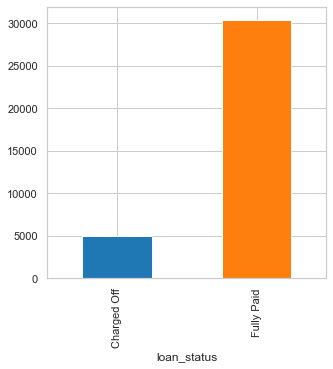

In [39]:
#ploting for loan_status
plt.figure(figsize=(5,5))
ax = loan_df.groupby('loan_status')['loan_amnt'].count().plot.bar(color = sns.color_palette('tab10',20))
plt.show()

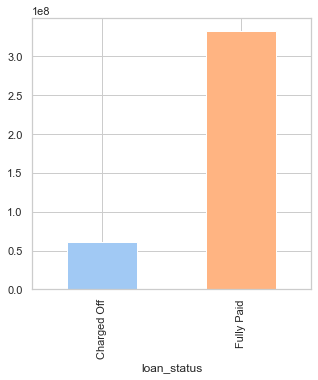

In [40]:
plt.figure(figsize=(5,5))
ax = loan_df.groupby('loan_status')['loan_amnt'].sum().plot.bar(color = sns.color_palette('pastel',20))
plt.show()

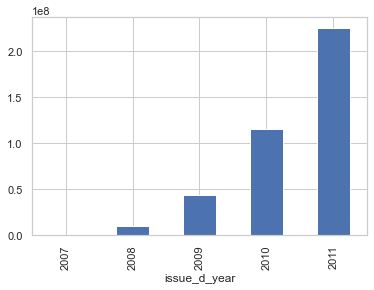

In [41]:
#total loan amount lent in each year
loan_df.groupby('issue_d_year')['loan_amnt'].sum().plot.bar()
plt.show()



The maximum number of loans given on year 2011.

In [42]:
loan_df.loan_status.value_counts()

Fully Paid     30424
Charged Off     4943
Name: loan_status, dtype: int64

In [43]:
loan_df[loan_df['loan_status']=='Charged Off']['loan_status'].count()/len(loan_df.index)*100

13.976305595611729

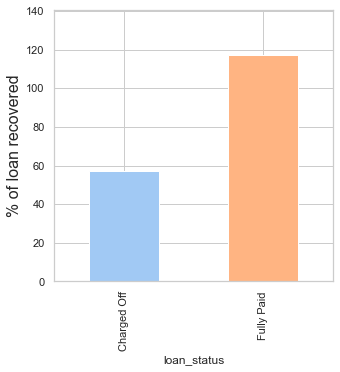

In [44]:
#total pergentage of loan recovered
plt.figure(figsize=(5,5))
ax = (loan_df.groupby('loan_status')['total_pymnt'].sum()*100/loan_df.groupby('loan_status')['loan_amnt'].sum()).plot.bar(color=sns.color_palette('pastel',16))
ax.set_ylabel('% of loan recovered',fontsize=16)
plt.margins(0.2,0.2)

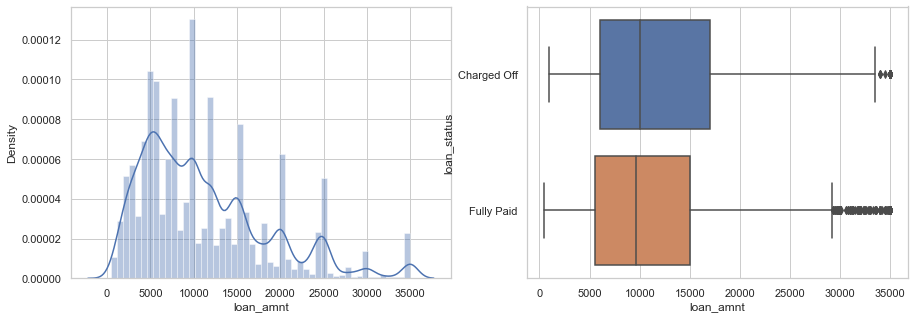

In [45]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
ax = sns.distplot(loan_df['loan_amnt'])
plt.subplot(1, 2, 2)
sns.boxplot(x=loan_df['loan_amnt'], y=loan_df['loan_status'], data=loan_df)
plt.show()

In [46]:
loan_df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,4943.0,12286.147077,8064.255961,1000.0,6000.0,10000.0,17000.0,35000.0
Fully Paid,30424.0,10945.731166,7181.867451,500.0,5500.0,9600.0,15000.0,35000.0


In [47]:
loan_df['loan_amnt'].describe()

count    35367.000000
mean     11133.071790
std       7326.233093
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

- Most of the applicants applied for loan amount below 20000 
- Defaults/Charged off are more for the highest loan amounts

In [48]:
loan_df['loan_amnt_bin'] = pd.cut(loan_df['loan_amnt'],
                                  [x for x in range(0,36000,5000)],labels=[str(x)+'-'+str(x+5)+'k' for x in range(0,35,5)])

In [49]:
def Status_plt(dataframe, col, loanstatus='Charged Off'):
    grp = dataframe.groupby(['loan_status',col])[col].count()
    cnt = dataframe.groupby(col)[col].count()
    percentages = grp.unstack() * 100 / cnt.T
    ax = percentages.loc[loanstatus].plot.bar(color=sns.color_palette('muted', 16))
    ax.set_ylabel('% of ' + loanstatus +' '+'loans')
    plt.margins(0.2, 0.2)
    plt.tight_layout()
    return ax

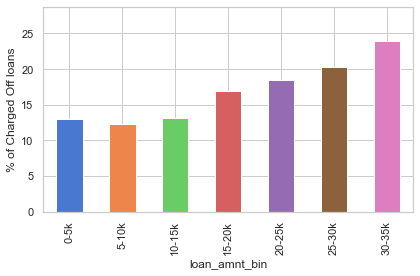

In [50]:
Status_plt(loan_df,'loan_amnt_bin');



###### Most loans are below 20000 amount. The higher loans, though lesser in number, but higher risk of default.


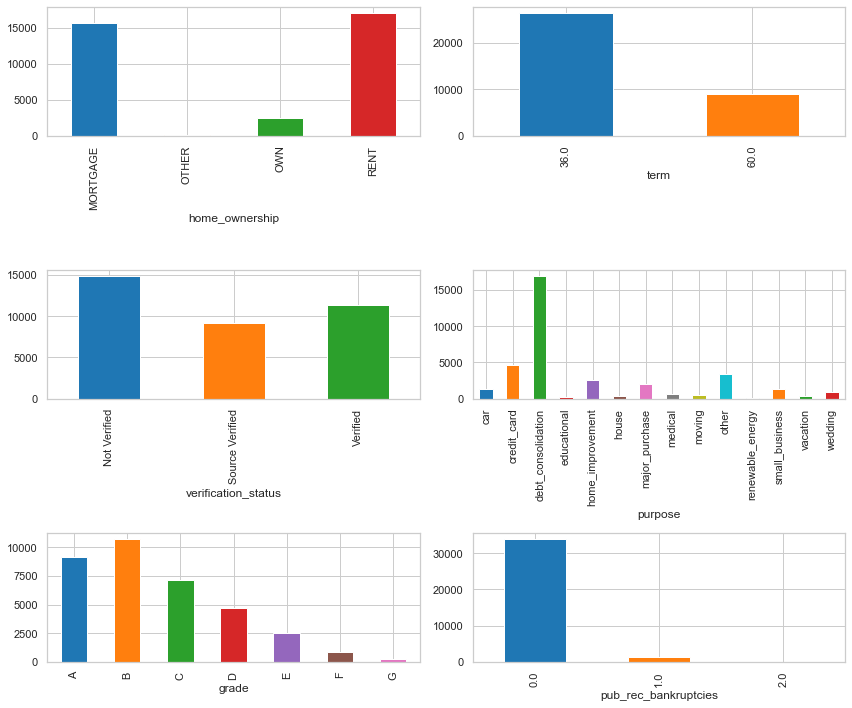

In [51]:
plt.figure(figsize=(12,10))
list_variables = ['home_ownership', 'term', 'verification_status', 'purpose', 'grade', 'pub_rec_bankruptcies']
for indx,coln in enumerate(list_variables,start=1):
        rows = int(len(list_variables)/2)
        plt.subplot(rows, 2, indx)
        loan_df.groupby([coln])['loan_amnt'].count().plot.bar(color=sns.color_palette('tab10'))
plt.tight_layout()



- Most approved loans are high grade(A,B,C)
- Most of the loans are issued for 36 month term
- Very few people with prior record of bankruptcy got loan
- Most of the people took the loan for debt_consolidation


In [52]:
def plt_per(data_frame,group_by):
  plt.figure(figsize=(10,5))
  plt.margins(1,1)
  plt.subplot(1,2,1)
  values=(data_frame[group_by].value_counts(normalize=True)*100)
  ax=values.plot(kind='bar',color=sns.color_palette('Paired', 20))
  ax.set_xlabel(group_by,fontsize=12)
  ax.set_ylabel('% total',fontsize=10)
  plt.subplot(1,2,2)
  values1=(data_frame[data_frame['loan_status']=='Charged Off'][group_by].value_counts(normalize=True))*100
  ax=values1.plot(kind='bar',color=sns.color_palette('Paired', 20))
  ax.set_xlabel(group_by,fontsize=12)
  ax.set_ylabel('% of Charged Off',fontsize=10)

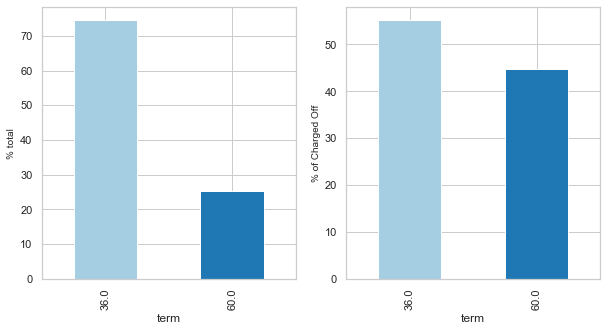

In [53]:
plt_per(loan_df,'term')

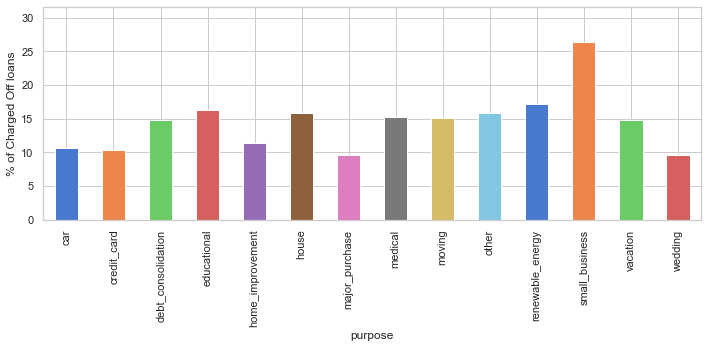

In [54]:
#Plot for the 'purpose' variable
plt.figure(figsize=(10,5))
Status_plt(loan_df,'purpose');

- Lets consider few top purpose

In [135]:
#lets look into interest rates column 
loan_df.groupby('loan_status')['int_rate'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,4943.0,13.929828,3.647619,5.42,11.49,13.79,16.45,24.40
Fully Paid,30424.0,11.667243,3.613734,5.42,8.59,11.49,14.09,24.11


In [136]:
#Rounding the interest_rates
loan_df['int_rate_round'] = round(loan_df['int_rate'])

In [137]:
(loan_df.groupby(['loan_status','int_rate_round'])['int_rate_round'].count().unstack()/loan_df.groupby(['int_rate_round'])['int_rate_round'].count())

int_rate_round,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0
loan_status,,,,,,,,,,,,,,,,,,,,
Charged Off,0.025743,0.030891,0.053387,0.066184,0.073115,0.099539,0.11615,0.144928,0.150211,0.161486,0.186542,0.210462,0.255141,0.264479,0.296599,0.338164,0.35473,0.426752,0.487805,0.409091
Fully Paid,0.974257,0.969109,0.946613,0.933816,0.926885,0.900461,0.88385,0.855072,0.849789,0.838514,0.813458,0.789538,0.744859,0.735521,0.703401,0.661836,0.64527,0.573248,0.512195,0.590909


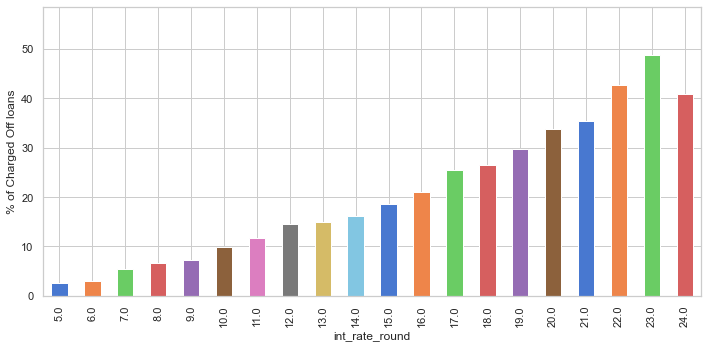

In [138]:
plt.figure(figsize=(10,5))
Status_plt(loan_df,'int_rate_round');



- Overall, the interest rate varies from 5.42% to 24.4% with average interest rate of 11.8%.
- The interest rate for Charged Off loans appear to be higher than for Fully paid.

In [139]:
#Lets look into installment variable
loan_df.groupby('loan_status')['installment'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,4943.0,338.848452,214.527655,22.79,172.4350,298.33,458.3150,1305.19
Fully Paid,30424.0,321.638693,205.828423,16.08,167.2975,278.24,422.3075,1295.21



loans Charged Off have high installment on average

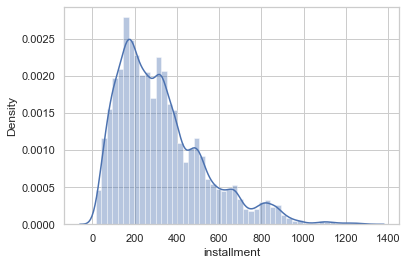

In [140]:
sns.distplot(loan_df['installment']);

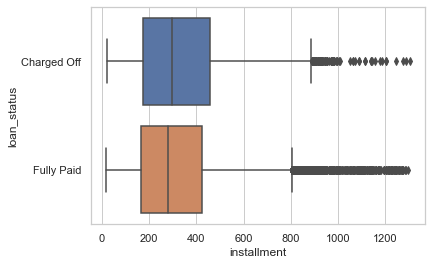

In [141]:
sns.boxplot(x=loan_df['installment'],y=loan_df['loan_status']);

##### Lets take a look into grade and subgrades

In [142]:
loan_df['grade'].value_counts()

B    10718
A     9140
C     7181
D     4663
E     2481
F      902
G      282
Name: grade, dtype: int64

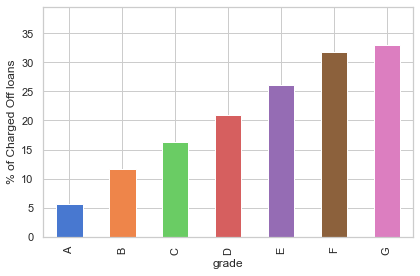

In [143]:
Status_plt(loan_df,'grade');

- Grades D,E,F,G are risky loans.

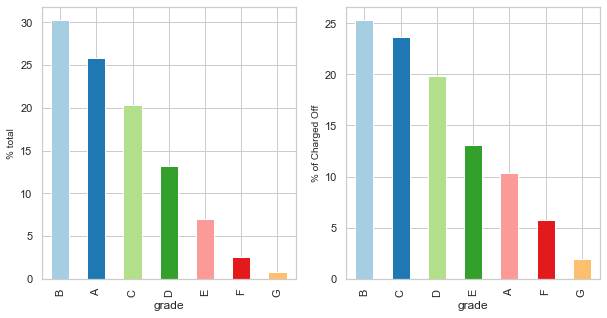

In [144]:
plt_per(loan_df,'grade')

###  Emp_title - Top Ten customers who took the loan- based on there title 

In [145]:
#Top 10 customers who took the loan based on there title 
top10_emp  = loan_df['emp_title'].value_counts().head(10)

In [146]:
top10_emp

US Army              128
Bank of America      106
IBM                   65
AT&T                  57
Kaiser Permanente     55
Wells Fargo           52
UPS                   51
USAF                  51
US Air Force          50
Walmart               44
Name: emp_title, dtype: int64

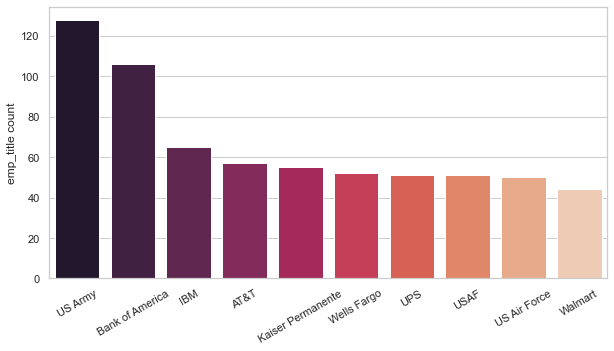

In [147]:
plt.figure(figsize=(10,5))
a = sns.barplot(x=top10_emp.index,y=top10_emp.values,palette='rocket')
a.set_ylabel('emp_title count')
a.set_xticklabels(a.get_xticklabels(),rotation=30)
plt.show()

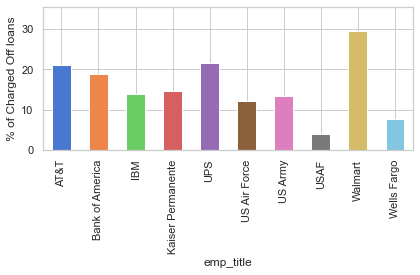

In [148]:
Status_plt(loan_df[loan_df['emp_title'].isin(top10_emp.index)],'emp_title')
plt.show()


- The most frequent loan applicants are US Army , Bank of America,IBM etc
- The Walmart have highest charged off % among the top Ten emp_title

### Variable emp_length (total years of experience)

In [149]:
loan_df['emp_length'].value_counts(normalize=True)*100

10    22.699126
2     11.544660
0     11.247773
3     10.837787
4      9.064948
5      8.604066
1      8.366556
6      5.830294
7      4.631436
8      3.848220
9      3.325134
Name: emp_length, dtype: float64

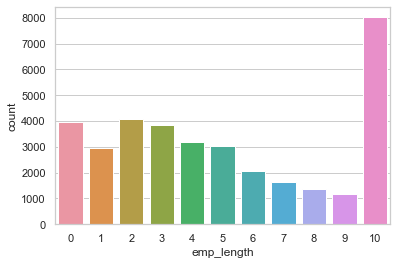

In [150]:
sns.countplot(loan_df['emp_length'],order = sorted(loan_df['emp_length'].unique()))
plt.show()

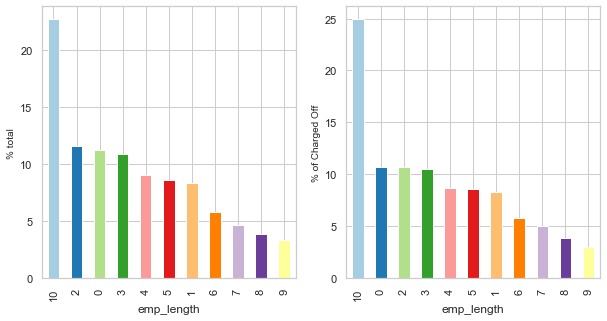

In [151]:
plt_per(loan_df,'emp_length')


- The employment length doesnt make much difference in charge off loan status.
- Maximum applicants are of 10 years+ emp_length overall about 22.69%

##### Variable- home_owmership

In [152]:
loan_df['home_ownership'].value_counts(normalize=True)*100

RENT        48.251195
MORTGAGE    44.400147
OWN          7.082874
OTHER        0.265784
Name: home_ownership, dtype: float64

In [153]:
ax = loan_df['home_ownership'].value_counts(normalize=True)*100

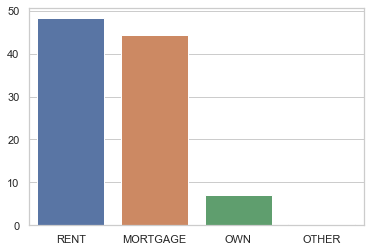

In [154]:
sns.barplot(x=ax.index,y=ax.values);

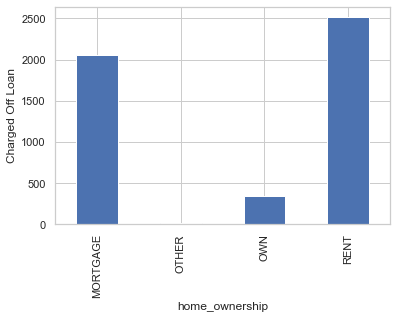

In [155]:
ax = (loan_df.groupby(['loan_status','home_ownership'])['loan_amnt'].count().unstack()).loc['Charged Off'].plot.bar()
ax.set_ylabel('Charged Off Loan')
plt.show()

- Most of the Loan applicatnts has house_ownership as Rent,Mortgage
- Highest charged off of loan is also from Rent and Mortgage

#### Varification_status: Analysis of loan varification status

In [156]:
loan_df['verification_status'].value_counts()

Not Verified       14840
Verified           11363
Source Verified     9164
Name: verification_status, dtype: int64

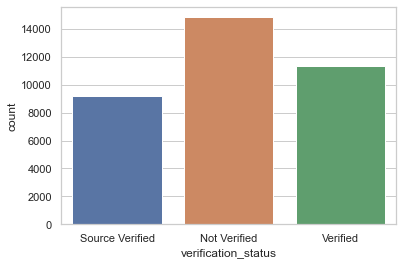

In [157]:
sns.countplot(loan_df['verification_status'])
plt.show()

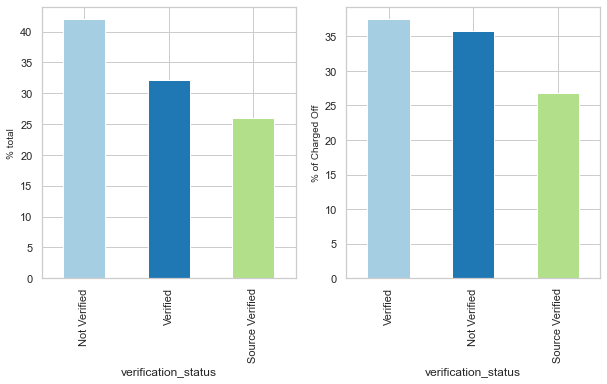

In [158]:
plt_per(loan_df,'verification_status')


- Maximum loans are not verifed
- when we consider only charged off loans both verified and not verified are almost same in numbers whith difference of 1.2% 

### issue_d_year - loan Issued on the particular year

In [159]:
loan_df['issue_d_year'].value_counts(normalize=True)*100

2011    53.976871
2010    30.522804
2009    12.506008
2008     2.977352
2007     0.016965
Name: issue_d_year, dtype: float64

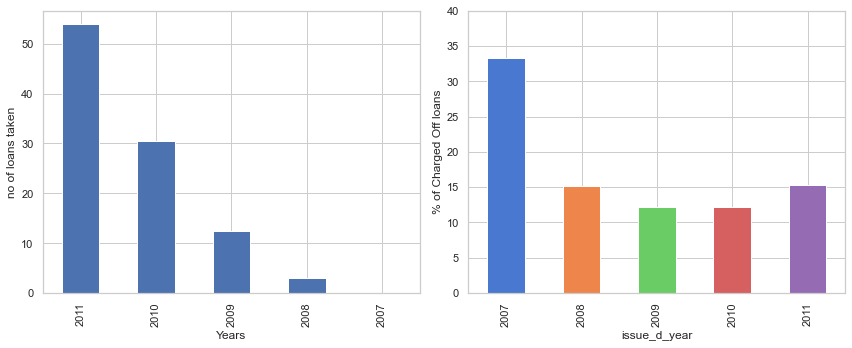

In [160]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
ax = (loan_df['issue_d_year'].value_counts(normalize=True)*100).plot.bar()
ax.set_ylabel('no of loans taken')
ax.set_xlabel('Years')
plt.subplot(1,2,2)
Status_plt(loan_df,'issue_d_year')
plt.show()


- Maximum loans are issued in the year 2011
- maximum loans are defaulted in the year 2007

### Dti variable

In [161]:
loan_df['dti'].describe()

count    35367.000000
mean        13.403961
std          6.636540
min          0.000000
25%          8.320000
50%         13.500000
75%         18.640000
max         29.990000
Name: dti, dtype: float64

In [162]:
loan_df['dti_bin'] = pd.cut(loan_df['dti'],[x for x in range(0,35,5)],labels=[str(x)+"-"+str(x+5) for x in range(0,30,5)])

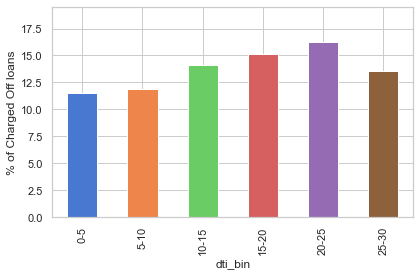

In [163]:
Status_plt(loan_df,'dti_bin')
plt.show()



- dti is drirectly propotional to the number of defaults or charged Off
- the dti bin 20 above are most likely to be default

##### delinq_2yrs

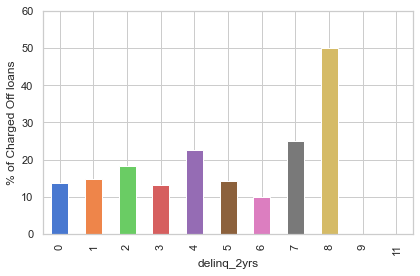

In [164]:
#plot of delinq_2yrs on x axis and % of loans charged of on y axis
Status_plt(loan_df,'delinq_2yrs')
plt.show()

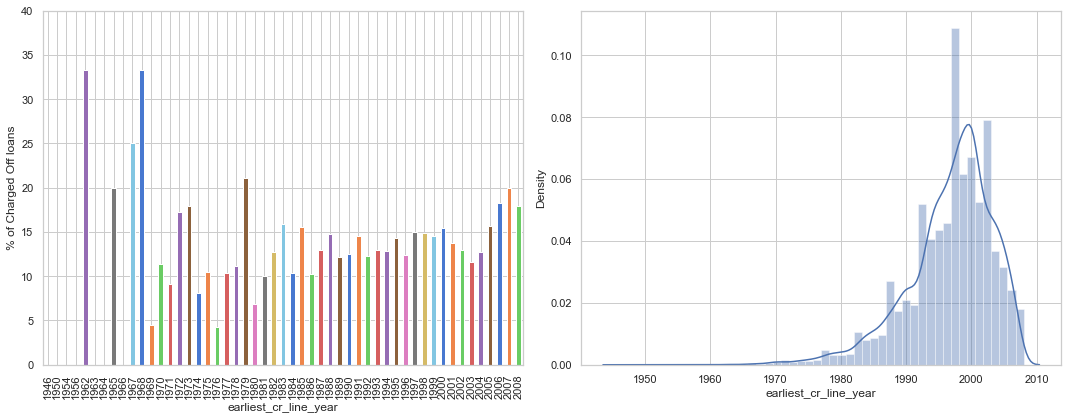

In [165]:
#plot of earliest_cr_line_year on x axis and % of loans charged of on y axis
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
ax = Status_plt(loan_df,'earliest_cr_line_year')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.subplot(1,2,2)
sns.distplot(loan_df['earliest_cr_line_year'])
plt.tight_layout()
plt.show()


- Among the charged off loan applicants most of of them have earlier_cr_line_year in the year 2000

In [166]:
loan_df['pub_rec'].value_counts(normalize=True)*100

0    94.766308
1     5.083835
2     0.124410
3     0.019792
4     0.005655
Name: pub_rec, dtype: float64

In [167]:
loan_df.groupby(['loan_status','pub_rec'])['pub_rec'].count().unstack()

pub_rec,0,1,2,3,4
loan_status,,,,,
Charged Off,4545.0,388.0,10.0,NaN,NaN
Fully Paid,28971.0,1410.0,34.0,7.0,2.0


In [168]:
loan_df['pub_rec'].describe()

count    35367.000000
mean         0.054147
std          0.235734
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          4.000000
Name: pub_rec, dtype: float64

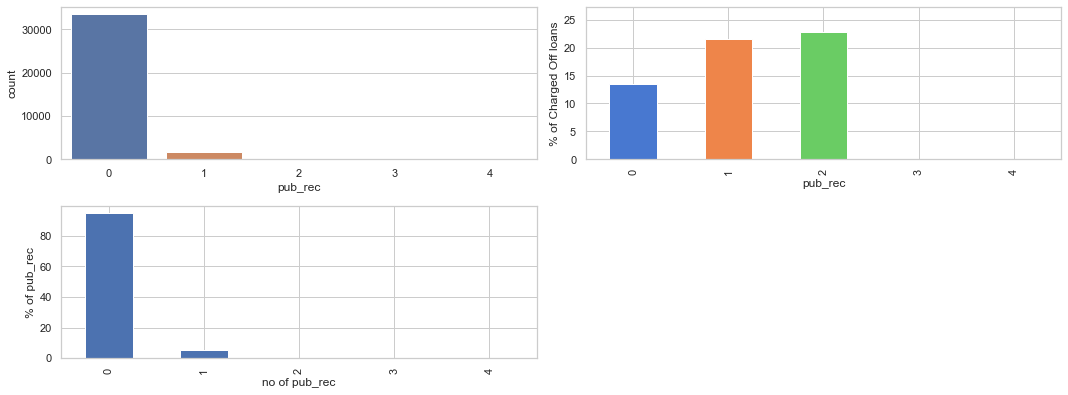

In [169]:
plt.figure(figsize=(15,8))
plt.subplot(3,2,1)
sns.countplot(loan_df['pub_rec'])
plt.subplot(3,2,2)
Status_plt(loan_df,'pub_rec')
plt.subplot(3,2,3)
ax = (loan_df['pub_rec'].value_counts(normalize=True)*100).plot.bar()
ax.set_xlabel('no of pub_rec')
ax.set_ylabel('% of pub_rec')
plt.tight_layout()
plt.show()



- 94.76% Loan Applicants have zero pub_rec
- 5.4% Loan Applicants have 1 to 4 pub_rec
- Loan Apllicants having 3 or 4 pub_rec dont have any charged off but that counts are very less when we compare with overall count of pub_rec

##### revol_bal


In [170]:
loan_df['revol_bal'].describe()

count     35367.000000
mean      13367.676733
std       15678.460397
min           0.000000
25%        3782.000000
50%        8934.000000
75%       17064.500000
max      149588.000000
Name: revol_bal, dtype: float64

In [171]:
loan_df.groupby(['loan_status'])['revol_bal'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,4943.0,13680.089824,14768.969553,0.0,4246.5,9562.0,17809.0,147365.0
Fully Paid,30424.0,13316.918847,15820.937992,0.0,3711.0,8833.0,16941.0,149588.0


OBSERVATION

- There is no much difference between charged off and fully Paid loans mean in revolving balance

##### revol_util

In [172]:
loan_df['revol_util'].describe()

count    35367.000000
mean        49.139015
std         28.228038
min          0.000000
25%         25.900000
50%         49.700000
75%         72.600000
max         99.900000
Name: revol_util, dtype: float64

In [173]:
loan_df['revol_util_bin'] = round(loan_df['revol_util']/5)

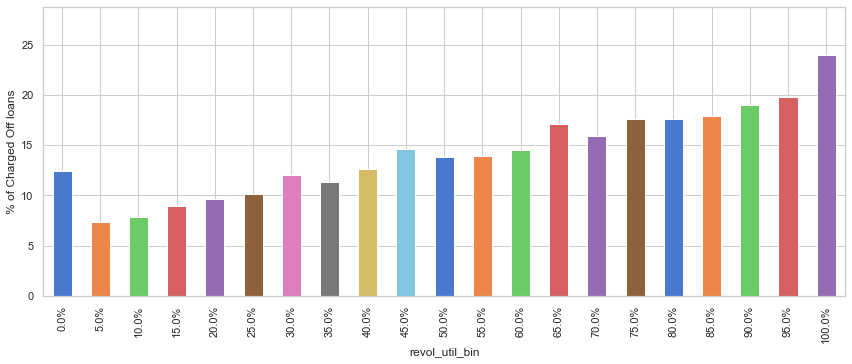

In [174]:
plt.figure(figsize=(12,5))
ax = Status_plt(loan_df, 'revol_util_bin')
ax.set_xticklabels([(str(float(x.get_text())*5)+'%') for x in ax.get_xticklabels()])
plt.show()

##### last_credit_pull_d

In [175]:
loan_df['last_credit_pull_d'].describe()

count                   35367
unique                     96
top       2016-05-01 00:00:00
freq                     8718
first     2008-03-01 00:00:00
last      2016-05-01 00:00:00
Name: last_credit_pull_d, dtype: object

In [176]:
loan_df['last_credit_pull_d_year'] = loan_df['last_credit_pull_d'].dt.year
loan_df['last_credit_pull_d_month'] = loan_df['last_credit_pull_d'].dt.month

In [177]:
loan_df['last_credit_pull_d_year'].value_counts()

2016    13297
2014     5719
2015     5138
2013     4772
2012     3742
2011     1902
2010      633
2009      145
2008       19
Name: last_credit_pull_d_year, dtype: int64

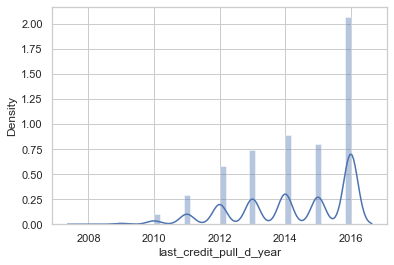

In [178]:
sns.distplot(loan_df['last_credit_pull_d_year'])
plt.show()


- In recent years Lending club is collecting more details about the last credit,which tells that they are taking more precaution before giving the loan

#### Bivariate Analysis

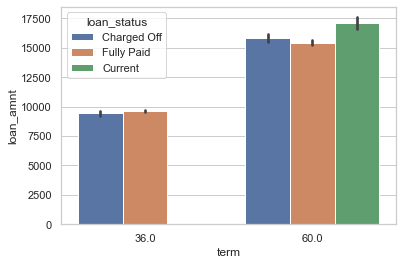

In [179]:
#Ploting term on x-axis and loan_amnt on y-axis for different loan status
sns.barplot(x='term', y='loan_amnt', hue="loan_status", data=loan_all_status, estimator=np.mean)
plt.show()


- Most of the charged Off loans belongs to 60 months term

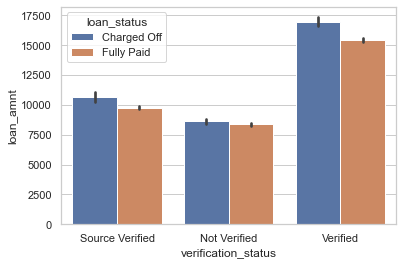

In [180]:
#Ploting veification_status on x-axis and loan_amnt on y-axis for different loan status
sns.barplot(x='verification_status', y='loan_amnt', hue="loan_status", data=loan_df, estimator=np.mean)
plt.show()


- Most of loans which are verified are higher amount loan and more likely be to charged off

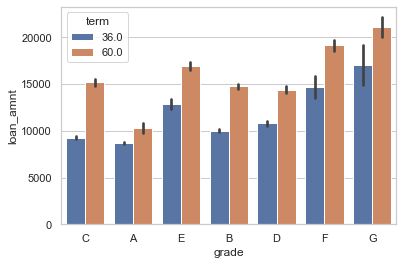

In [181]:
#Ploting grade on x-axis and loan_amnt on y-axis for different grades
sns.barplot(x='grade', y='loan_amnt', hue="term", data=loan_df, estimator=np.mean)
plt.show()

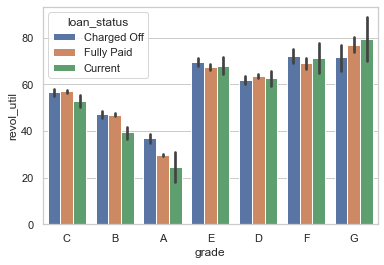

In [182]:
sns.barplot(x='grade', y='revol_util', hue="loan_status", data=loan_all_status, estimator=np.mean)
plt.show()

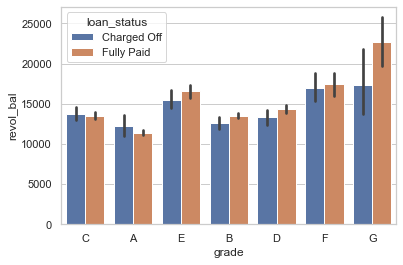

In [183]:
sns.barplot(x='grade',y='revol_bal',hue='loan_status',data=loan_df)
plt.show()

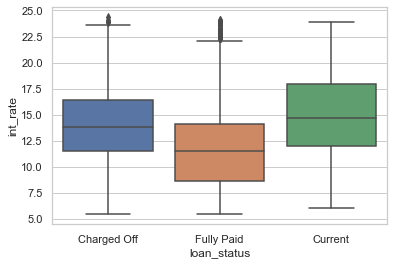

In [184]:
#Ploting the box plot for int_rate for different loan_status
sns.boxplot(y='int_rate',x='loan_status',data=loan_all_status)
plt.show()

- Intrest rates ar more for the charged off loans compared to fully paid loan_status,so more the intrest rates more likely to be the defaults

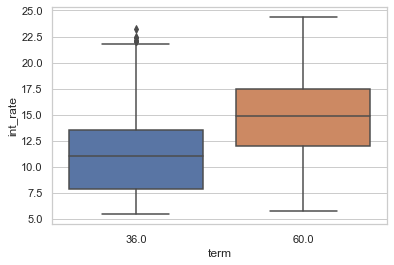

In [185]:
#Ploting the box plot for int_rate for 36 and 60 months term
sns.boxplot(y ='int_rate', x ='term',data=loan_df)
plt.show()

- intrest rates for 60 months term is more compared to 36 months term,which indicates that for higher amount loan associated with long term, the intrest rates are more

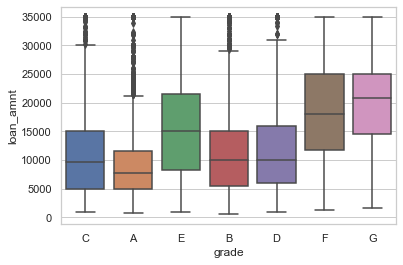

In [186]:
sns.boxplot(y ='loan_amnt', x ='grade',data=loan_df)
plt.show()

### Line plots 

##### total number of loans issued in that paritcular year

In [187]:
total_count = loan_df.groupby('issue_d_year')['loan_amnt'].count()

In [188]:
total_count

issue_d_year
2007        6
2008     1053
2009     4423
2010    10795
2011    19090
Name: loan_amnt, dtype: int64

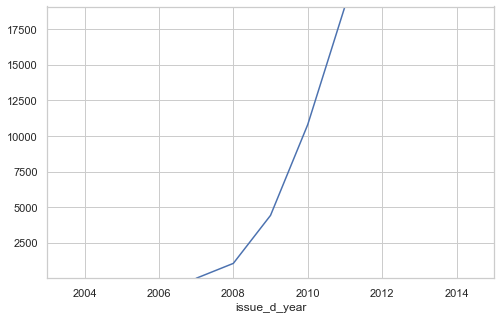

In [189]:
plt.figure(figsize=(8,5))
sns.lineplot(total_count.index,total_count.values)
plt.margins(1,0)

######  average loan_amnt issued in that particular year

- Number of loans lended to the customers increasing year to year

In [190]:
average_amount = loan_df.groupby('issue_d_year')['loan_amnt'].mean()

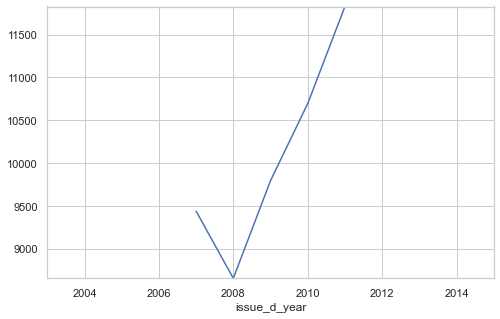

In [191]:
plt.figure(figsize=(8,5))
sns.lineplot(average_amount.index,average_amount.values)
plt.margins(1,0)

##### total sum of loan_amnt issued in that particular year

- In the Year 2008 very less amount of loans are issued 

In [192]:
sum_loan_amnt = loan_df.groupby('issue_d_year')['loan_amnt'].sum()

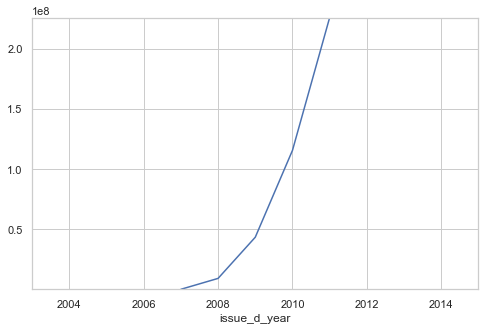

In [193]:
plt.figure(figsize=(8,5))
sns.lineplot(sum_loan_amnt.index,sum_loan_amnt.values)
plt.margins(1,0)

- sum of loan amount lended as a loan, incresing year to year

###### Scatter Plots to understand loan_amnt ,annual_income for different loan_status

In [194]:
df_inc = loan_all_status[loan_all_status['annual_inc']<250000][['annual_inc','loan_amnt','loan_status']]

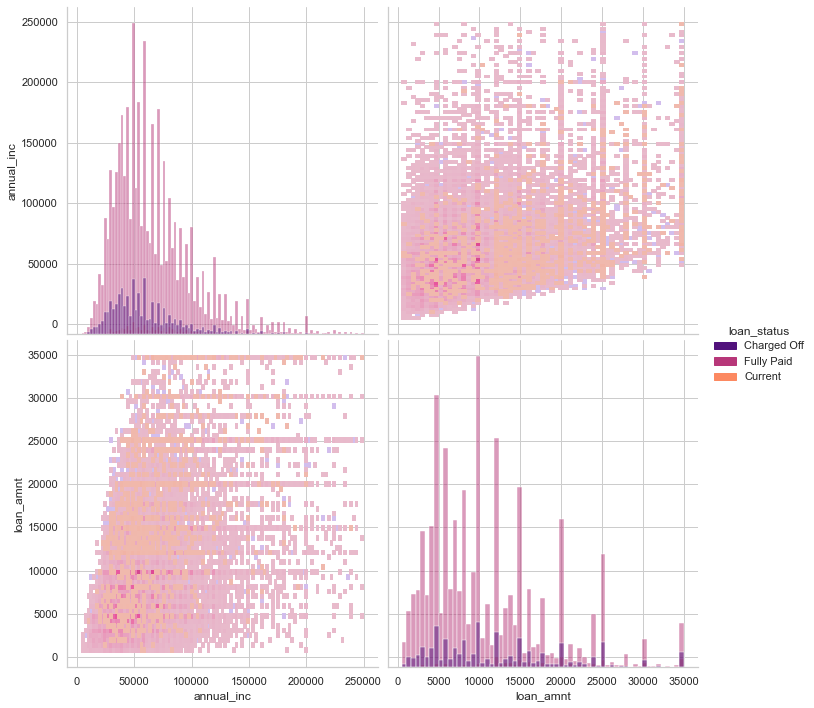

In [195]:
sns.pairplot(df_inc,hue='loan_status',palette = 'magma',kind = 'hist',size = 5)
plt.show()

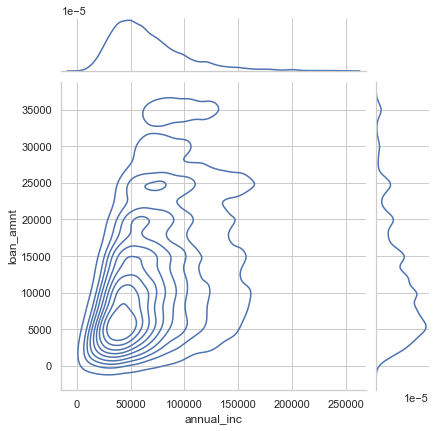

In [196]:
sns.jointplot(data=df_inc,x='annual_inc',y='loan_amnt',kind='kde')
plt.show()

- Most of the Loan given to the applicants who have very less annual income i.e (having income below 50000 and taken loan more than 25000),those kind of loans are high risk

In [197]:
co_relation= ['loan_amnt', 'int_rate', 'installment',
       'emp_length', 'annual_inc',
       'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies']
corelation_plot = loan_df[co_relation].corr()

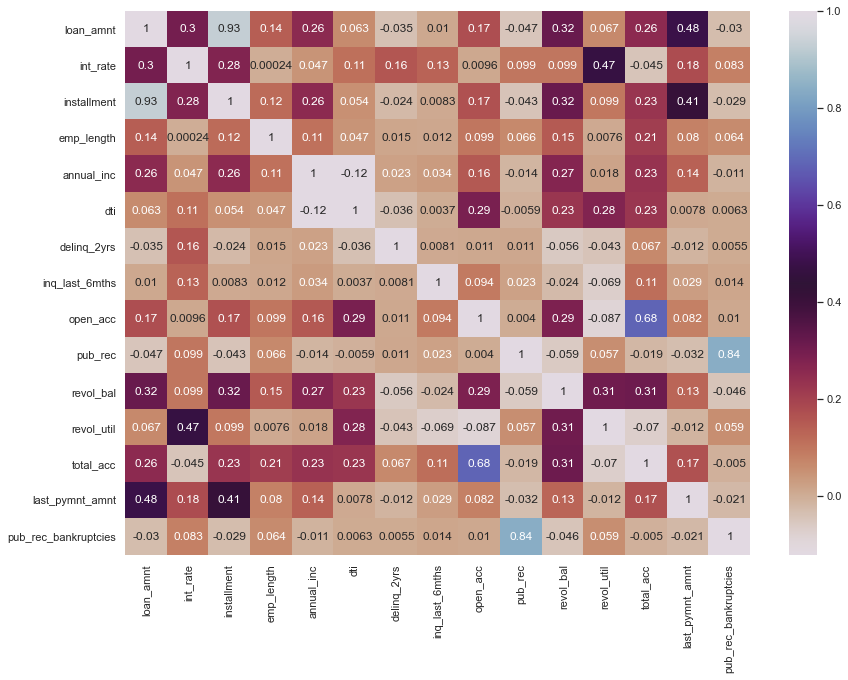

In [198]:
plt.figure(figsize=(14,10))
ax = sns.heatmap(corelation_plot,annot=True,cmap='twilight_r')
plt.show()

##### The loan_amnt and its correlation with the few variables
- int_rate has 0.29 with loan_amnt
- annual_inc has 0.25 with loan_amnt
- last_pymnt_amnt has 0.47 with loan_amnt
- revol_bal has 0.31 with loan_amnt
- total_acc has 0.25 with loan_amnt


- The interest rate has higher correlation i.e(0.47)  with revol_util. Lending Club charges higher interest from risky customers.


- The loan amount given to the customers without considering the annual_income(where few loan applicants have taken the loan amount 50% more than there annual income).This scenario has to be taken care.